<DIV ALIGN=CENTER>

# Introduction to Text Classification
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, we introduce text classification. This is a
powerful, yet sometimes intimidating topic that finds applications in a
number of different areas: product reviews, sentiment analysis, and
document classification. Part of the challenge lies in the difficulty of
applying mathematical algorithms to (potentially very large) character
data sets. In Python, however, this challenge is considerably simplified
by using nltk and the scikit learn machine learning library.

-----

In [1]:
# Set up Notebook

% matplotlib inline

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

### Data

To get started with text classification, we will analyze the [twenty
newsgroup][tng] data set. We first download this data (scikit learn has
built in methods for doing this, however, we have cached a copy locally
on our server). The data are made available via a custom object, but we
can access the data of interest by using dictionary keys. Before delving
into text data mining, we first explore this data over several code
cells to understand more about the task at hand.

-----

[tng]: http://kdd.ics.uci.edu/databases/20newsgroups/20newsgroups.data.html

In [2]:
# load dataset
from sklearn.datasets import fetch_20newsgroups

train = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='train', shuffle=True, random_state=23)
test = fetch_20newsgroups(data_home='/home/data_scientist/data/textdm', subset='test', shuffle=True, random_state=23)

In [3]:
# Uncomment to explore training and testing data
#help(train)

In [4]:
# The data can be accessed via Dictionary keys

train.keys()

dict_keys(['data', 'target_names', 'filenames', 'DESCR', 'target'])

In [9]:
print("Number of Training Samples: {0}".format(len(train['data'])))
print("Number of Testing Samples: {0}".format(len(test['data'])))
print(40*'-')

for idx, label in enumerate(train['target_names']):
    print('Class {0:2d} = {1}'.format(idx, label))

Number of Training Samples: 11314
Number of Testing Samples: 7532
----------------------------------------
Class  0 = alt.atheism
Class  1 = comp.graphics
Class  2 = comp.os.ms-windows.misc
Class  3 = comp.sys.ibm.pc.hardware
Class  4 = comp.sys.mac.hardware
Class  5 = comp.windows.x
Class  6 = misc.forsale
Class  7 = rec.autos
Class  8 = rec.motorcycles
Class  9 = rec.sport.baseball
Class 10 = rec.sport.hockey
Class 11 = sci.crypt
Class 12 = sci.electronics
Class 13 = sci.med
Class 14 = sci.space
Class 15 = soc.religion.christian
Class 16 = talk.politics.guns
Class 17 = talk.politics.mideast
Class 18 = talk.politics.misc
Class 19 = talk.religion.misc


In [11]:
item_number = 250
print("Class Number = {0}".format(train['target'][item_number]))
print("Class Name = {0}".format(train['target_names'][train['target'][item_number]]))
print("-"*70)
print(train['data'][item_number])

Class Number = 3
Class Name = comp.sys.ibm.pc.hardware
----------------------------------------------------------------------
From: rnichols@cbnewsg.cb.att.com (robert.k.nichols)
Subject: Re: how to search for bad memory chips.
Organization: AT&T
Distribution: na
Lines: 29

In article <N5s42B8w165w@c-cat.UUCP> david@c-cat.UUCP (Dave) writes:
>i came upon this idea i would like to share with everyone.
>
>to check for bad memory chips
>
>1. create a boot disk with emm386 himem.sys and ramdrive.sys in the
>   config/autoexec.bat.
>
>2. boot the PC to create a RAM drive as large as possible.
>
>3. use a disk repair utility ( I use NDD ). Run it on the RAM
>        drive, yes it will run, its only a device driver
>
>4. run 1000 or so passes, they go very quick
>
>5. if your machine fails, there is a definate bad memory chip
>
>6. if your machine passes, there is a conflict with programs you
>        are loading in memory.
...

It's an interesting idea, but the worst-case data patterns devel

-----
### Bag of Words

A simple question about text data mining that you might have is _How
does one classify documents made up of words when machine learning
algorithms work on numerical data?_ The simple answer is we need to
build a numerical summary of a data set that our algorithms can
manipulate. A conceptually easy approach  to implement this idea is to
identify all possible words in the documents of interest and to track the
number of times each words occurs in specific documents. This produces a
(very) sparse matrix for our sample of documents, where the columns are
the possible words (or tokens) and the rows are different documents. 

This concept, where one tokenizes documents to build these sparse
matrices is more formally known as _bag of words_, because we effectively
create the [bag of words][bwd] out of which are documents are
constructed. In the bag of words model, each document can be mapped into
a vector, where the individual elements correspond to the number of
times the words (associated with the particular column) appears in the
document.

With scikit learn, we can use the `CountVectorizer` to break our
document into tokens (in this case words), which are used to construct
our _bag of words_ for the given set of documents. Given this tokenizer,
we first need to construct the list of tokens, which we do with the
`fit` method. Second, we need to transform our documents into this
sparse matrix, which we do with the `transform` method. Since both steps
use the same input dta, there is a convenience method to perform both
operations at the same time, called `fit_transform`.

-----
[bwd]: https://en.wikipedia.org/wiki/Bag-of-words_model

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

print(cv)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)


-----

Given the `CountVectorizer` we can see the number of words in our _bag_
as well as the number of documents on which we train, which in this case
agrees with the values we obtained when we read in the data.

-----

In [13]:
train_counts = cv.fit_transform(train['data'])
train_counts.shape

(11314, 130107)

-----

We can grab the words in our _bag of words_ by extracting the _vocubulary_. This allows us to see if words are present in the documents.

-----

In [14]:
words = cv.vocabulary_

my_word = u'reboot'
print(words.get(my_word))

print("Arbitrary Word = {0}: Count = {1}".format(my_word, words[my_word]))

print("Max Word = {0}: Count = {1}".format(max(words), words[max(words)]))
print("Min Word = {0}: Count = {1}".format(min(words), words[min(words)]))

99908
Arbitrary Word = reboot: Count = 99908
Max Word = ýé: Count = 130106
Min Word = 00: Count = 0


In [15]:
list(words.items())[:10]

[('qfn', 97753),
 ('doctrinal', 48404),
 ('ak8', 27134),
 ('takeoff', 113281),
 ('purple', 97073),
 ('scua8yua8cx', 105508),
 ('hoegertrafik', 63661),
 ('crouch', 43566),
 ('scoliosis', 105306),
 ('20i', 8615)]

-----

## Classification

To this point, we have identified the features (or tokens in the
training documents) that we should use to classify our documents. But
this potential obscures the challenge of actually classifying documents.
Before introducing our first classification technique, examine one
document that is in our test data set. 

What typs of issues do you foresee in classifying documents like the one
shown?

-----

In [16]:
test_message = 100

print("Class Number = {0}".format(test['target'][test_message]))
print("Class Name = {0}".format(test['target_names'][test['target'][test_message]]))
print("-"*75)
print(test['data'][test_message])

Class Number = 6
Class Name = misc.forsale
---------------------------------------------------------------------------
From: jks2x@holmes.acc.Virginia.EDU (Jason K. Schechner)
Subject: Re: AN12 AIRCRAFT FOR SALE OR LEASING
Keywords: AIRCRAFT SALE
Organization: University of Virginia
Lines: 43

In article <AA9KerhuZ7@rtools.msk.su> slavik@rtools.msk.su writes:
>
>Our firm is in a position to either sell or lease  the serverses
>of one AN-12 air cargo transport aircraft  (with the complete
>technical repair in 1993 ).
>
>Terms of Delivery:
>
>1. The price of the aircraft is $840000.
>
>2. The price of leasing is $42800 per month with the guarantee
>    flight time more than 60 hours.
>
>    This price includes :
>        a) the price of the aircraft.
>        b) the price of insurance of the aircraft and the pilots.
>
>   The price of leasing does not include :
>        a) the fuel price.
>        b) the price of technical service.
>        c) taxes , airport taxes, air navigations expen

In [17]:
test_data = cv.transform(test['data'])

-----

### Naive Bayes Classifier

One of the (if not the) simplest techniques for perfomring text
classification is the [Naive Bayes classifier][nbd]. This technique is
popular, in part because of its simplicity, yet it also provides a quick
technique that can provide reasonable results. Fundamentally this method
applies Bayes theorem by (naively) assuming independence between the
features. In scikit learn, we will use a [Multinomial Naive Bayes][nbapi]
model, where we treat each feature independently. Thus we calculate the
likelihood of a feature corresponding to each training label, and the
accumulation of these likelihoods provides our overall classification.
By working with log-likelihoods, this accumulation becomes a simple sum.

-----

[nbd]: https://en.wikipedia.org/wiki/Naive_Bayes_classifier
[nbapi]: http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

In [18]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB prediction accuracy =  77.3%


-----

We can also use the built-in `metrics` methods to display more
information about the classification results, including as a function of
the different labels.

-----

In [19]:
from sklearn import metrics
print(metrics.classification_report(test['target'], predicted,
    target_names = test['target_names']))

                          precision    recall  f1-score   support

             alt.atheism       0.79      0.77      0.78       319
           comp.graphics       0.67      0.74      0.70       389
 comp.os.ms-windows.misc       0.20      0.00      0.01       394
comp.sys.ibm.pc.hardware       0.56      0.77      0.65       392
   comp.sys.mac.hardware       0.84      0.75      0.79       385
          comp.windows.x       0.65      0.84      0.73       395
            misc.forsale       0.93      0.65      0.77       390
               rec.autos       0.87      0.91      0.89       396
         rec.motorcycles       0.96      0.92      0.94       398
      rec.sport.baseball       0.96      0.87      0.91       397
        rec.sport.hockey       0.93      0.96      0.95       399
               sci.crypt       0.67      0.95      0.78       396
         sci.electronics       0.79      0.66      0.72       393
                 sci.med       0.87      0.82      0.85       396
         

-----

We can also visually display the confusion matrix (where we show how
documents were misclassifid) by using Seaborn to create a heatmap visual.
First we create our confusion matrix method, which we subsequently use to
display the results from our Naive Bayes model.

-----

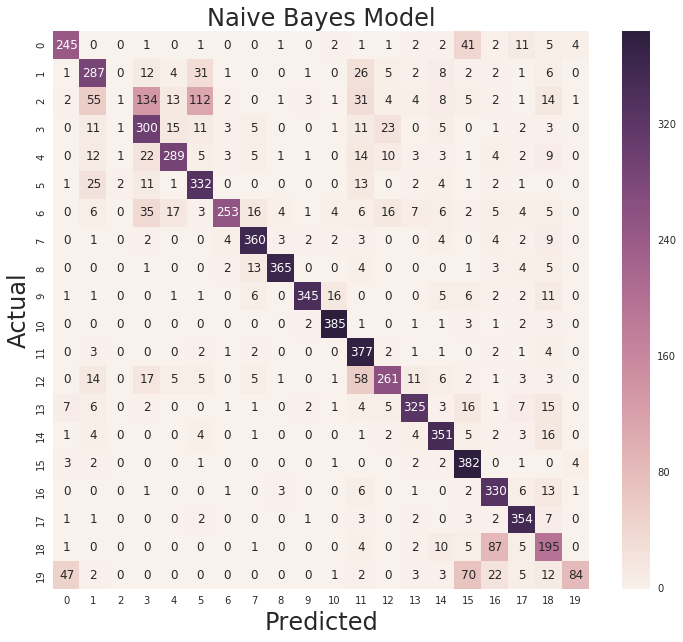

In [20]:
fig, ax = plt.subplots(figsize=(12, 10))

from helper_code import mlplots as mp
mp.confusion(test['target'], predicted, range(20), 20, 'Naive Bayes Model')

-----

## Student Activity

In the preceding cells, we used several outlier detection techniques to
identify manually added outliers to the Iris data. Now that you have run
the Notebook, go back and make the following changes to see how the
results change.

1. Change the number of outlier points added to the two _Sepal_
features, including noise points, transposed columns, and incorrect
measurements. How does this visually change the distribution? How does it
affect the statistical summarizations?
2. Change the parameters used in the DBSCAN algorithm. How does this
affect the outlier detection? How does bandwidth used in the KDE
estimator. How does this affect the resulting plot?
3. Try using a different kernel function, for example a `linear` or
`poly` with the `OneClassSVM`. How does this affect the outlier
detection process?

Finally, the previous cells only modified the _Sepal_ features, try
making four-dimensional fake data by creating fake _Petal_ features as
well. Can you still apply the demonstrated techniques to the four
dimensional data set.

-----

-----

### Stop Words

Text documents often contain many occurrences of the same word. For
example, in a document written in _English_, words such as _a_, _the_,
_of_, and _it_ likely occur very frequently. When classifying a document
based on the number of times specific words occur in the text document,
these words can lead to biases, especially since they are generally
common in **all** text documents you might want to classify. As a
result, the concept of [_stop words_][swd] was invented. Basically these
words are the most commonly occurring words that should be removed during
the tokenization process in order to improve subsequent classification
efforts. 

We can easily specify that the __English__ stop words should be
excluded during tokenization by using the `stop_words` parameter as
shown below. Note that with this simple change, our classification
accuracy has increased.

-----
[swd]: https://en.wikipedia.org/wiki/Stop_words

NB prediction accuracy =  80.2%


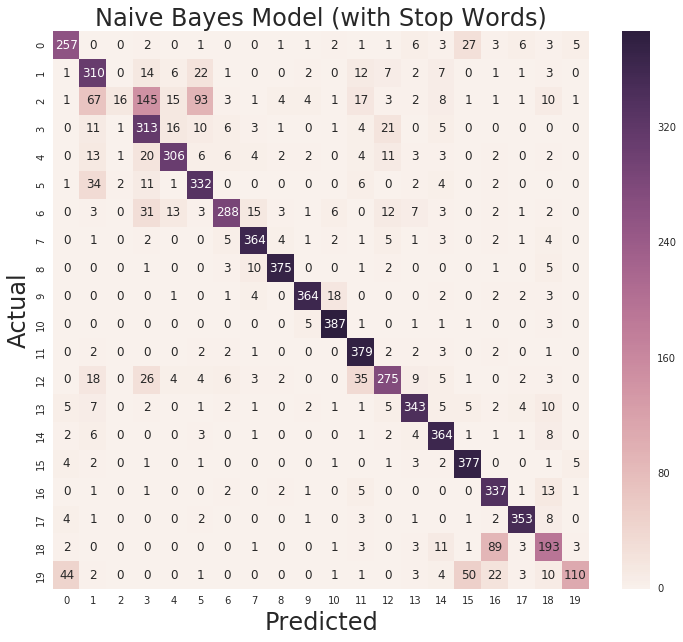

In [21]:
cv = CountVectorizer(stop_words = 'english')
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

sns.set(style="white", context='paper', font='monospace')
sns.set(font_scale=1.0)
fig, ax = plt.subplots(figsize=(12, 10))

mp.confusion(test['target'], predicted, range(20), 20, 'Naive Bayes Model (with Stop Words)')

In [ ]:
from helper_code import digits as hd

fakes = hd.make_fakes()
hd.plot_numbers(fakes[:8])
hd.plot_numbers(fakes[8:])

ones = hd.make_ones()
hd.plot_numbers(ones)

sevens = hd.make_sevens()
hd.plot_numbers(sevens)

-----

### Identification of image outliers

Now that the data are loaded (and fake data are created), we first
combine the data together into a new array. We have twenty-five _fake_
images, to go along with the _real_ digit data. We perform a PCA
analysis of these combined data, and explore the explained variance from
each PCA component. Finally, we plot the distribution of combined digit
data in two plots. The first uses the primary PCA components, while the
second uses the last two PCA components. These plots demonstrate how a
small number of _noisy_ data, or outliers, can often be identified, and
thus removed, from a data set by transforming into a lower dimensional
space.

-----

In [ ]:
# Principal Component Analysis
from sklearn.decomposition import PCA

# Number of fake images
n_fakes = 25

# Compute PCA for digit data and transform
pca = PCA(n_components=8, copy=True)
from sklearn.preprocessing import scale

x2 = x.copy()
x2[x2>0] = 16

xx = np.append(x2, fakes, axis=0)
xx = np.append(xx, ones, axis=0)
xx = np.append(xx, sevens, axis=0)

data = pca.fit_transform(scale(xx))
#pca.transform(fakes).shape

print("Explained Variance per PCA component\n", 35*'-')
for idx, val in enumerate(pca.explained_variance_ratio_):
    print('PCA component {0:2d}: {1:4.1f}%'.format(idx, val*100))
    
print(35*'-', '\nTotal Explained Variance (All PCA components: {0:4.1f}%\n'.format(
 sum(pca.explained_variance_ratio_[:]*100)))

print('Variance explained (First two PCA components): {0:4.1f}%\n'.format(
    sum(pca.explained_variance_ratio_[:2]*100)))

print('Variance explained (Last two PCA components): {0:4.1f}%\n'.format(
    sum(pca.explained_variance_ratio_[-2:]*100)))

In [ ]:
def plot_digit_pca(x, y, idx, ax, llc, xlbl, ylbl):
    
    ax.scatter(x[:-idx], y[:-idx], color='b', marker='o', \
               alpha=0.5, s=30, label='Real Data')
    
    ax.scatter(x[-idx:], y[-idx:], color='r', marker='d', \
               alpha=0.5, s=60, label='Fake Data')

    ax.legend(loc=llc, frameon=True)
    ax.set_xlabel(xlbl)
    ax.set_ylabel(ylbl)
    sns.despine(offset=10)

sns.set(style='white', font_scale=1.5, 
        rc={'xtick.major.size': 4.0, 'ytick.major.size': 4.0})

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

plot_digit_pca(data[:, 0], data[:, 1], n_fakes, axs[0], 2, 'First PCA', 'Second PCA')
plot_digit_pca(data[:, -2], data[:, -1], n_fakes, axs[1], 3, 'Second to Last PCA', 'Last PCA')

plt.tight_layout()

-----

## Student Activity

In the preceding cells, we used PCA to transform the combined digit data
and to explore the distribution of the real data and outliers in
two-dimensional plots by using different PCA components. Now that you
have run the Notebook, go back and make the following changes to see how
the results change.

1. Change the number of PCA components lower and higher. How does this
affect the separation of the outliers?
2. Change the PCA components used to make these plots, for example
to the third and fourth component. How does this affect the separation
of the outliers?
3. Try making a new fake data point that combines the 'bar' image from
the helper code with an existing number, such as a six. Using a
different color ini the plots for this data point, where does this new,
more realistic _fake_ data point lie in the previous plots?

Finally, try applying a classifier on the new digit data. Can you
explain (feel free to use the class forums) why the classification
algorithm performed in the  manner it did for the new _fake_ digits?

-----